# Auditory Sound Processing - Part II: Time Dependence

In [1]:
# Standard packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

# Special imports
from scipy.io.wavfile import read
from IPython.display import Audio, display

In [2]:
# Same setup as Part I
curDir = r'D:\Users\thomas\Office\python\CSS\ipynb'
audioDir = r'data\sounds'
os.chdir(curDir)


def pSpect(data, rate):
    '''Calculation of power spectrum and corresponding frequencies'''
    
    nData = len(data)
    fftData = np.fft.fft(data)
    PowerSpect = fftData * fftData.conj() / nData
    freq = np.arange(nData) * float(rate) / nData
    
    return (np.real(PowerSpect), freq)

# Human Voice
<img src='data/images/545px-Pharyngeal_flap_procedures3.gif', width=200>

## A Vowel

In [4]:
soundFile = os.path.join(audioDir, 'e_vowel.wav')
Audio(url=soundFile, autoplay=False)

In [6]:
rate, data = read(soundFile)
data.dtype

dtype('int16')

**Watch out with the datatype**, as overflow behavior is different from language to language!

In [7]:
data[0]

-1024

In [9]:
np.uint8(data[0]+200)

200

### Formants
**Formants** are defined as *"A range of frequencies [of a complex sound] in which there is an absolute or relative maximum in the sound spectrum."*

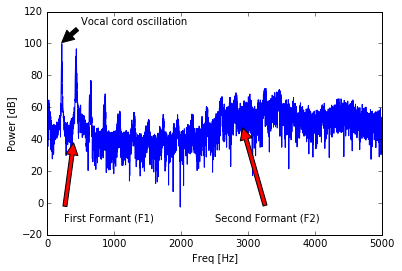

In [14]:
# Read in the data, and calculate and plot the power-spectrum
rate, data = read(soundFile)
power, freq = pSpect(data, rate)
plt.plot(freq, 10*np.log10(power))

# Format the plot
plt.xlim(0, 5000)
plt.xlabel('Freq [Hz]')
plt.ylabel('Power [dB]')

# Label important features of the plot
def label(axis, text, position, textLocation, color):
    axis.annotate(text, xy=position, xycoords='data',
                xytext=textLocation, textcoords='axes fraction',
                arrowprops=dict(facecolor=color, shrink=0.05),
                horizontalalignment='left', verticalalignment='top')

label(plt.gca(), text='Vocal cord oscillation', position=(200,100), textLocation=(0.1, 0.98), color='black')
label(plt.gca(), text='First Formant (F1)', position=(400,40), textLocation=(0.05, 0.1), color='red')
label(plt.gca(), text='Second Formant (F2)', position=(2900,50), textLocation=(0.5, 0.1), color='red')

## All Vowels
The next file contains *all* vowels:

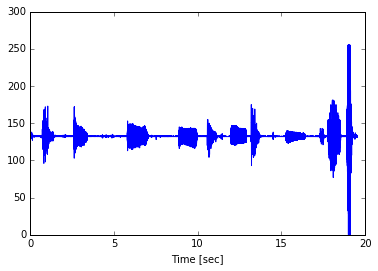

In [16]:
soundFile = os.path.join(audioDir, 'vowels.wav')
rate, data = read(soundFile)
t = np.arange(len(data))/rate

# Show the data
plt.plot(t,data)
plt.xlabel('Time [sec]')

# Play them
Audio(url=soundFile, autoplay=False)

But with such a long sound-file, we don't want to know the frequency context of the *whole* file at once: we would like to obtain the frequency components *as a function of time*.
This can be done with a *spectrogram*:

### Spectrogram

C:\WinPython-64bit-3.5.1.2\python-3.5.1.amd64\lib\site-packages\matplotlib\axes\_axes.py:7042: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


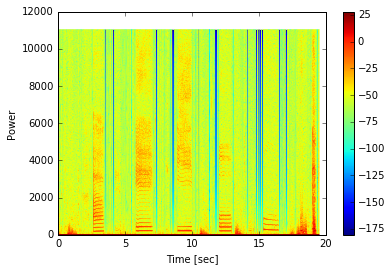

In [17]:
from matplotlib.pyplot import specgram
_ = specgram(data, NFFT=1024, Fs=rate)
plt.xlabel('Time [sec]')
plt.ylabel('Power')
plt.colorbar()

To obtain the time dependence, each time-point (on the x-axis) in *spectrogram* contains the power-spectrum (y-axis) from the corresponding *time-window* (see Figure below), with the amplitude of the power spectrum represented by the corresponding color.

<img src='data/images/sound.png', width=500>

#### Detour: Shorter Timewindow -> wider Powerspectrum
Link to [Soundproc_2b_Windowing](Soundproc_2b_Windowing.ipynb)

Note the effect of the width of the sampling window:

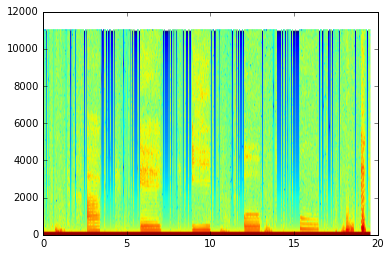

In [37]:
_ = specgram(data, NFFT=256, Fs=rate)

<font color='red'>
<img src="data/images/matlab_logo_s.jpg", width=50px, align='left'>*Matlab Equivalent Commands*:
</font>

    spectrogram(data, 512, 450, 512, rate);

## Bandpass

A *bandpass* can be implemented in two ways:

* through an FFT, with selection of the corresponding components
* through an IIR-filter

<img src='data/images/Simulation_CI.jpg', width=500>

[Soundproc_1_Basics](Soundproc_1_Basics.ipynb)<img src="data/images/Forward_Backward.png" align="middle"> [Soundproc_3_LinearFilters](Soundproc_3_LinearFilters.ipynb)

    Author: Thomas Haslwanter
    Date: March 13, 2016
    Ver: 1.1

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.